# Análise Exploratória dos Dados

## Entendimento de Negócio
Este é um dataset disponibilizado pelo Kaggle que contém informações de vendas e produtos de um restaurante. Os dados já se encontram pré-processados e limpos, todavia iremos certificar se ainda falta algo. Nosso objetivo com esse estudo é traçar perfís de clientes por segmentação, e caso fosse um projeto real, gerar insights para o time de negócios e o time de marketing visando uma maior rellação entre Empresa/Cliente.


#### Dicionário de dados

- order_id : um identificador exclusivo para cada pedido.
- date : data da transação.
- item_name : nome do alimento.
- item_type : categoria do item (Fastfood ou Bebidas).
- item_price : preço do item para 1 quantidade.
- quantity : quanta quantidade o cliente pede.
- transaction_amount : o valor total pago pelos clientes.
- transaction_type : método de pagamento (dinheiro, online, outros).
- received_by : gênero da pessoa que processa a transação.
- time_of_sale : diferentes horários do dia (manhã, noite, tarde, noite, meia-noite).

## Entendendo os dados

#### Importando bibliotecas

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score


warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv(os.getcwd()+'\\data\\raw\\restatorio_de_vendas_restaurante.csv')
data.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [3]:
# converte a coluna 'date' no formato MM DD YYYY
data_mdy = pd.to_datetime(data['date'], format='%m/%d/%Y', errors='coerce')

# converte a coluna 'date' no formato DD MM YYY
data_dmy = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')

In [4]:
for i in range(len(data['date'])):
    
    if i == '-':
        # converte a coluna 'date' no formato MM DD YYYY
        data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')
        
    elif i == '/':
        # converte a coluna 'date' no formato DD MM YYYY
        data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y', errors='coerce')


In [5]:
for i in range(len(data['date'])):
    
    if '-' in data['date'][i]:
        
        # separa MM DD YYYY
        dia, mes, ano = data['date'][i].split('-')
        
        # reorganiza da forma desejada (DD MM YYYY)
        data['date'][i] = f'{mes}/{dia}/{ano}'

In [6]:
# converte de object para datetime
data['date']= pd.to_datetime(data['date'])

In [7]:
data.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-03-07,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-03-02,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-02-10,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,2022-03-05,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,2022-10-06,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


- Observe que no nosso dataframe na coluna 'date', possuem formatos de datas diferentes. Para converte-las do jeito mais comum usando apenas o "pd.to_datetime" não seria possível pois retornaria um erro. A maneira que encontrei para contornar este problema foi a utilização do arumento "coerce", que faz com que o Pandas tente converter os dados no formato especificado, e os outros são definidos como "NaT", dessa forma consegui separar os dados em dois blocos e converte-los um por vez.

In [8]:
for col in data:
    print(f'Coluna {col.upper()}:')
    print(data[col].value_counts())
    print('Quantidade de registros:', sum(data[col].value_counts()))
    print(45 * '_')

Coluna ORDER_ID:
order_id
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna DATE:
date
2022-11-10    8
2022-09-05    8
2022-08-31    8
2023-03-19    7
2023-03-02    7
             ..
2022-12-06    1
2022-04-15    1
2022-05-17    1
2022-07-23    1
2022-06-14    1
Name: count, Length: 348, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna ITEM_NAME:
item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64
Quantidade de registros: 1000
_____________________________________________
Coluna ITEM_TYPE:
item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64
Quantidade de registros: 1000
______________________________

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [10]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [11]:
data.describe()

,order_id,date,item_price,quantity,transaction_amount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022-10-02 05:15:21.600000,33.315000,8.162000,275.230000
min,1.000000,2022-01-04 00:00:00,20.000000,1.000000,20.000000
25%,250.750000,2022-06-17 00:00:00,20.000000,4.000000,120.000000
50%,500.500000,2022-09-21 00:00:00,25.000000,8.000000,240.000000
75%,750.250000,2023-01-02 00:00:00,50.000000,12.000000,360.000000
max,1000.000000,2023-12-03 00:00:00,60.000000,15.000000,900.000000
std,288.819436,NaN,14.921744,4.413075,204.402979


In [12]:
data.duplicated().sum()

0

#### Observações:
- Na coluna 'transaction_type' apresenda alguns valores NaN, mas temos a informação de que esses valores ausente na verdade são categorizados como outros métodos de pagamento, logo iremos criar um rótulo a eles para preencher esses espaços.
- A quantidade de itens por pedido varia de 1 - 15 unidades.
- O gênero das pessoas estão rotulados como "Mr." e "Mrs."Iremos substituir por "M" para homens e "F" para mulheres, tornando mais simples a identificação.
- Os tipos de dados estão corretos.
- Nenhum valor duplicado.

In [13]:
# Substituindo valores da coluna 'received_by
data['received_by'] = data['received_by'].str.replace('Mr.', 'M').str.replace('Mrs.','F')

In [14]:
# Completando valores nulos na coluna 'transaction_type'
data['transaction_type'] = data['transaction_type'].fillna('Others')

#### Vizualizando a distribuição dos dados

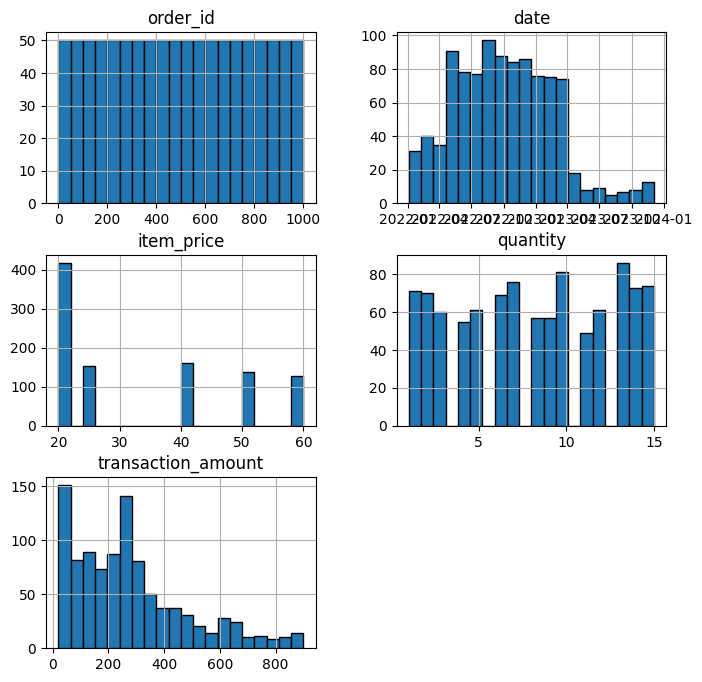

In [15]:
# Histograma
data.hist(figsize=(8,8), bins=20, edgecolor = 'black');

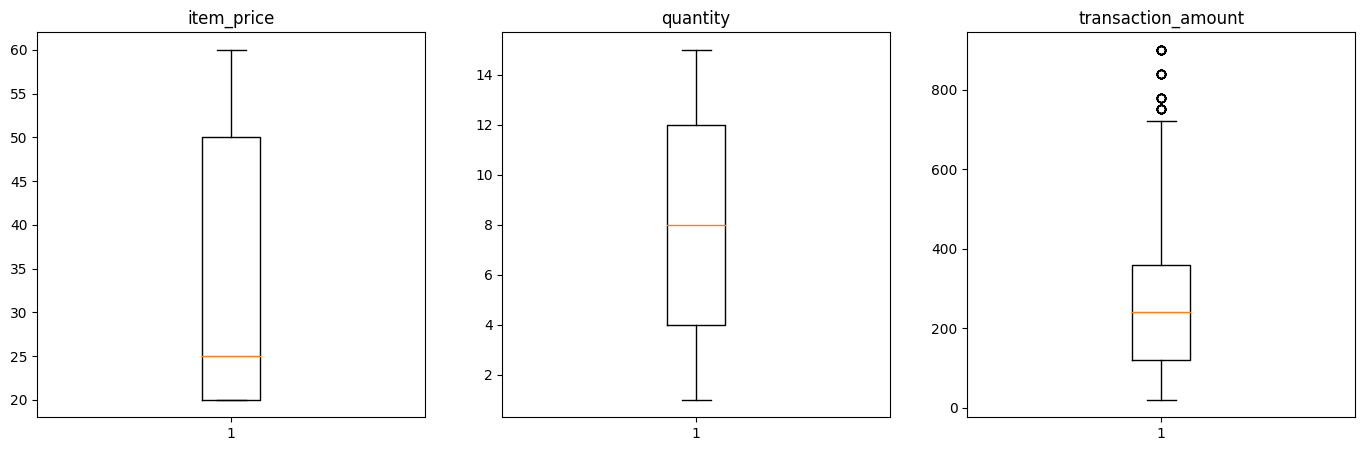

In [16]:
# Gráfico de Boxplot
columns = ['item_price', 'quantity', 'transaction_amount']

plt.figure(figsize=(17,5))
    
for i in range(len(columns)):
    plt.subplot(1,3,i+1)
    plt.title(columns[i])
        
    plt.boxplot(data[columns[i]])
        
plt.show()

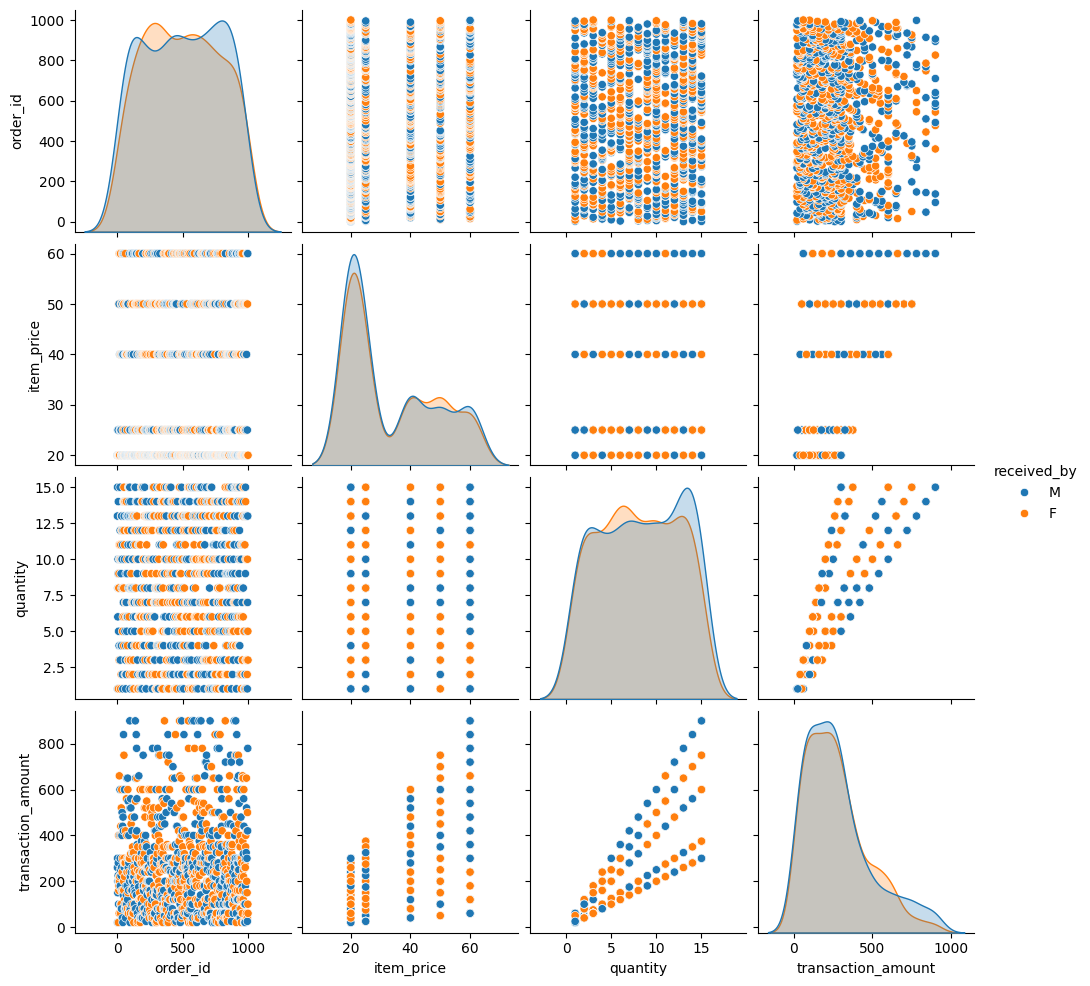

In [17]:
# Gráfico de Scatterplot
sns.pairplot(data, hue='received_by')

#### Observações:
 - 'order_id' é uma variável contínua, logo é esperado que no histograma não apresente curvas.
 - 'item_price' apresenta uma maior quantidade de produtos vendidos com valores de 20 dólares, os demais valores tem uma pequena variação entre sí.
 - A média de valor gasto está em torno de 250 dólares.
 - Em 'transaction_ amount' conseguimos notar alguns outliers, logo mais teremos que lidar com esses valores pois iremos aplicar um modelo de clusterização para segmentar os clientes, e a clusterização é muito sensível à outliers pois como é um modelo baseado nas distâncias entre os dados, um valor extremo pode atrapalhar na identificação dos grupos corretos.
 - Como já é de se imaginar, há uma correlação entre a quantidade de itens vendidos e o valor gasto.

#### Qual produto mais vendido?

In [18]:
data['item_name'].value_counts()

item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64

- Cold Coffee é o produto mais vendido

#### Em média qual gênero gasta mais?

In [19]:
m = data.loc[data['received_by'] == 'M']
f = data.loc[data['received_by'] == 'F']

print(f'Em média os HOMENS gastam {round(m["transaction_amount"].mean())} dólares.')
print(f'Em média as MULHERES gastam {round(f["transaction_amount"].mean())} dólares.')

Em média os HOMENS gastam 280 dólares.
Em média as MULHERES gastam 270 dólares.


- Apesar de bem parecidos os resultados, os homens gastam um pouco a mais. Entretando creio que não seja algo tão determinístico.

#### Qual comida mais pedida por gênero?

In [20]:
data.groupby('received_by')['item_name'].value_counts()

received_by  item_name      
F            Cold coffee        79
             Frankie            76
             Sugarcane juice    74
             Panipuri           73
             Vadapav            66
             Aalopuri           60
             Sandwich           60
M            Cold coffee        82
             Sugarcane juice    79
             Panipuri           77
             Aalopuri           74
             Sandwich           69
             Vadapav            68
             Frankie            63
Name: count, dtype: int64

- Tanto paras as mulheres quanto os homens, o item mais pedido é o Cold Coffee (Café Frio).
- Para as mulheres o item menos pedido é o Sandwich (Sanduíche)
- Já para os homens, o item com menos pedidos é o Frankie

#### Qual turno o restaurante é mais frentado? E quanto é a média de gasta por clientes a cada turno?

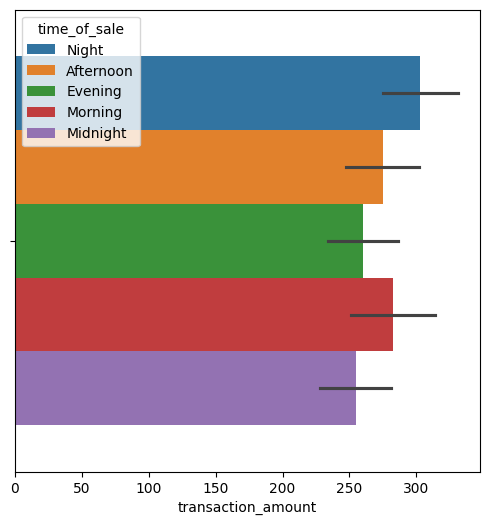

In [21]:
plt.figure(figsize=(6,6))
sns.barplot(data=data, x='transaction_amount', hue='time_of_sale')
plt.show()

____

# Pré-Processamento de Dados

Nossos dados apresentam algumas colunas nominais, para o processo de machine learning é muito importante que os dados estejam representados de forma numérica ou categórica. Nesta etapa faremos a transformação desses dados para posteriormente aplicarmos nossos modelos de clusterização.

#### Quem são os outliers de 'transaction_amount'?
Para descobrir as extremidades dos dados, usaremos o calculo interquartílico que nos informará as margens. Poderemos analisar quem são esses outliers e tomar uma decisão de o que fazer com eles com uma maior precisão.

In [22]:
# Cálculo Interquartílico na coluna 'transaction_amount'
q1 = data['transaction_amount'].quantile(0.25)
q3 = data['transaction_amount'].quantile(0.75)

# Intervalo Interquatpilico
iqr = q3-q1

# limite inferior
inf = q1 - 1.5 * iqr

# limite superior
sup = q3 + 1.5 * iqr

print(f'Limite Superior: {sup}')
print(f'Limite Inferior: {inf}')

Limite Superior: 720.0
Limite Inferior: -240.0


In [23]:
outlier_transaction = data.loc[data['transaction_amount'] > 720]

print(len(outlier_transaction), 'registros')

outlier_transaction

44 registros


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
47,48,2023-02-23,Sandwich,Fastfood,60,14,840,Online,M,Afternoon
50,51,2022-05-16,Frankie,Fastfood,50,15,750,Online,F,Morning
95,96,2022-08-22,Sandwich,Fastfood,60,15,900,Others,M,Morning
137,138,2022-01-09,Sandwich,Fastfood,60,15,900,Online,M,Night
144,145,2022-09-10,Sandwich,Fastfood,60,14,840,Online,M,Morning
147,148,2023-03-19,Sandwich,Fastfood,60,13,780,Online,M,Evening
197,198,2023-05-01,Frankie,Fastfood,50,15,750,Cash,M,Morning
269,270,2022-07-09,Sandwich,Fastfood,60,13,780,Cash,M,Evening
307,308,2022-12-17,Sandwich,Fastfood,60,13,780,Online,M,Evening
318,319,2022-06-30,Frankie,Fastfood,50,15,750,Cash,M,Afternoon


#### Observações sobre os outliers:
- Apresentam 44 registros de outliers, o que é cerca de 4,5% dos dados. Neste projeto vou optar pela remoção desses dados já que nosso objetivo principal é treinar modelos de clusterização que por sua vez são muito sensíveis ao distânciamento entre os dados. Em uma caso real, possivelmente seria converssado como time de negócios da empresa e chegar a uma conclusão de qual destino levaria esses outliers.

In [24]:
# criando variável de dados pré-processados e removendo outliers
data_proc = data.loc[data['transaction_amount'] <=720, :]
data_proc

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-03-07,Aalopuri,Fastfood,20,13,260,Others,M,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,M,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,M,Afternoon
3,4,2023-03-02,Sugarcane juice,Beverages,25,6,150,Online,M,Night
4,5,2022-02-10,Sugarcane juice,Beverages,25,8,200,Online,M,Evening
...,...,...,...,...,...,...,...,...,...,...
994,995,2022-06-18,Sugarcane juice,Beverages,25,1,25,Online,M,Night
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Others,F,Evening
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Others,M,Evening
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Others,F,Afternoon


In [25]:
# criando coluna que representa inicio meio e fim do mês
def categ_day(d):
    if d.day <=10:
        return 'start'
    
    elif d.day <=20:
        return 'mid'
    
    else:
        return 'end'
    
data_proc['period_of_month'] = data_proc['date'].apply(categ_day)

In [26]:
# convertendo valores de strings para numéricos
data_proc['item_type_encoded'] = data_proc['item_type'].astype('category').cat.codes
data_proc['transaction_type_encoded'] = data_proc['transaction_type'].astype('category').cat.codes
data_proc['received_by_encoded'] = data_proc['received_by'].astype('category').cat.codes
data_proc['time_of_sale_encoded'] = data_proc['time_of_sale'].astype('category').cat.codes


In [27]:
data_proc.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,period_of_month,item_type_encoded,transaction_type_encoded,received_by_encoded,time_of_sale_encoded
0,1,2022-03-07,Aalopuri,Fastfood,20,13,260,Others,M,Night,start,1,2,1,4
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,M,Afternoon,end,1,0,1,0
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,M,Afternoon,mid,1,0,1,0
3,4,2023-03-02,Sugarcane juice,Beverages,25,6,150,Online,M,Night,start,0,1,1,4
4,5,2022-02-10,Sugarcane juice,Beverages,25,8,200,Online,M,Evening,start,0,1,1,1
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,M,Evening,mid,1,0,1,1
6,7,2022-03-05,Sugarcane juice,Beverages,25,9,225,Cash,M,Evening,start,0,0,1,1
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,M,Night,end,1,1,1,4
8,9,2022-10-06,Panipuri,Fastfood,20,1,20,Cash,F,Morning,start,1,0,0,3
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,M,Afternoon,mid,1,1,1,0


In [28]:
# salvando dados processados
data_proc.to_csv('c:\\Users\\God\\Desktop\\DieGod\\Projetos\\Relatorio-De-Vendas-Restaurante\\data\\processed\\data_processado')

In [29]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  956 non-null    int64         
 1   date                      956 non-null    datetime64[ns]
 2   item_name                 956 non-null    object        
 3   item_type                 956 non-null    object        
 4   item_price                956 non-null    int64         
 5   quantity                  956 non-null    int64         
 6   transaction_amount        956 non-null    int64         
 7   transaction_type          956 non-null    object        
 8   received_by               956 non-null    object        
 9   time_of_sale              956 non-null    object        
 10  period_of_month           956 non-null    object        
 11  item_type_encoded         956 non-null    int8          
 12  transaction_type_encoded  9

____

# Modelagem de Dados

## Método K-Means

Nesta etapa utilizaremos o K-Means para nos auxiliar na identificação de grupos nos nossos dados. O K-Means é um método de agrupamento bastante utilizado para dividir um conjunto de dados e separar grupos com base na distância de seus centróides (ponto aleatório nos dados gerado altomáticamente pelo algorítimo). 

O K-Means é senssível a inicialização dos centróides, o que pode afetar nos seus resultados.

É necessário definir o numero de K (número de clusters). Utilizaremos alguns métodos que são responsáveis por nos dizer o melhor valor de K.

O K-Means é bastante eficiente computacionalmente, sendo adequado a grande conjuntos de dados.

## Identificando melhor número de K para os clusters

Entender a melhor quantidade de K em um projeto de clusterização é crucial. Quantidades inferiores ou superiores a quantidade correta de grupos (K) pode muitas vezes nos passas informações erradas sobre nossos dados, e isso pode afetar diretamente no objetivo final do projeto, no nosso caso mapear o perfil dos clientes. Para nos auxiliar nessa etapa existem alguns algorítmos que identificam a quantidade correta de K, sendo os mais conhecidos: Método de cotovelo, score de silhueta e gap statistics.

Nenhum desses métodos deve-se ser levado em consideração isoladamentem, a melhor solução seria analisa-los como um todo para chegar na melhor conclusão.

In [30]:
x = data_proc[['item_price', 'transaction_amount', 'quantity']]

#### Método de Cotovelo
Identifica os pontos em que a inclusão de novos clusters resulta em ganhos marginais na explicação da variância total dos dados. Calculando os valores de coesão para um número de clusters específico dividido pela soma do valor de coesão de todos os clusters testados temos a Porcentagem da Variância Explicada.

In [31]:
wcss = []
n_clusters = range(1,16)

for k in n_clusters:
    # criando pipeline de modelagem
    kmeans_test = Pipeline([
        ('scaler', RobustScaler()),
        ('kmeans', KMeans(init='k-means++', random_state=42, n_clusters=k))
    ])
    
    # ajustar o modelo
    kmeans_test.fit(x)

    # extraindo o WCSS
    wcss.append(kmeans_test['kmeans'].inertia_)

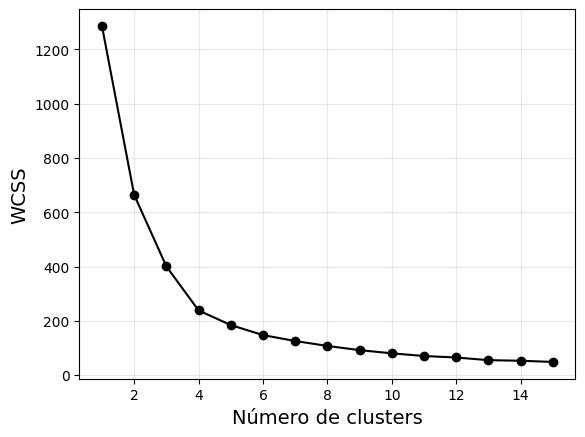

In [32]:
# crindo gráfico do cotovelo
plt.plot(n_clusters, wcss, 'ko-')
plt.xlabel('Número de clusters', size=14)
plt.ylabel('WCSS', size=14)
plt.grid(alpha=0.3)
plt.show()

#### Método de Silhueta
Fornece uma medida compreensiva que leva em conta tanto a coesão quanto a separação dos clusters.

 O valor dessa métrica varia de menos um a um. Valores próximos de um indicam que o ponto está bem ajustado ao seu próprio cluster e mal ajustado aos clusters vizinhos. Se o valor é próximo de zero, temos um ponto que está próximo a um limite de decisão entre dois clusters.Já um valor negativo indica que o ponto pode ter sido atribuído ao cluster errado.

In [33]:
s_score = []
n_clusters = range(2,21)

for k in n_clusters:
    # criando pipeline de modelagem
    kmeans_test = Pipeline([
        ('scaler', RobustScaler()),
        ('kmeans', KMeans(init='k-means++', random_state=42, n_clusters=k))
    ])
    
    kmeans_test.fit(x)
    
    cluster_labels = kmeans_test.predict(x)
    s_score.append(silhouette_score(X=x, labels=cluster_labels))


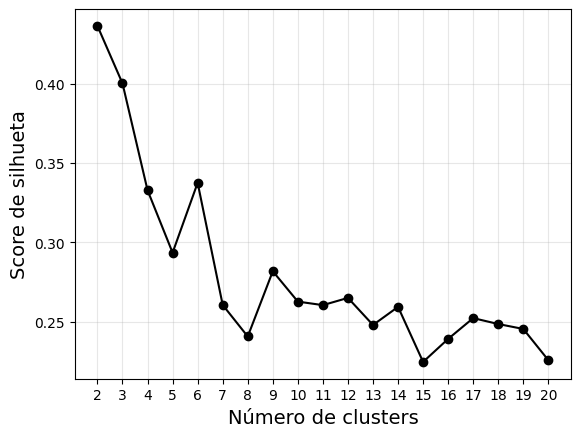

In [34]:
plt.plot(n_clusters, s_score, 'ko-')
plt.xlabel('Número de clusters', size=14)
plt.ylabel('Score de silhueta', size=14)
plt.grid(alpha=0.3)
plt.xticks(ticks=n_clusters, labels=n_clusters)
plt.show()

#### Método de Gap Statistics
O método calcula o WCSS dos clusters formados com os dados reais com o WCSS dos dados gerados aleatóriamente. Calcula o "gap" d K-means real e os resultados esperados aleatóriamente para diferentes valores de K.

O K com o maior "gap" é selecionado como K ideal.

In [35]:
wcss_real = []
wcss_ref = []
n_clusters = range(1,11)

# Definindo WCSS Real
for k in n_clusters:
    kmeans_test = Pipeline([
        ('scaler', RobustScaler()),
        ('kmeans', KMeans(init='k-means++', random_state=42, n_clusters=k))
    ])
    
    # ajustando modelo
    kmeans_test.fit(x)
    
    # extraindo wcss
    wcss_real.append(np.log(kmeans_test['kmeans'].inertia_))

- Para ambos os casos invés de usar-mos os valores absolutos, usaremos os valores logarítmos

In [36]:
# Criando WCSS de referência

ref_x = np.random.rand(x.shape[0], x.shape[1])

for k in n_clusters:
    kmeans_test = Pipeline([
        ('scaler', RobustScaler()),
        ('kmeans', KMeans(init='k-means++', random_state=42, n_clusters=k))
    ])
    
    kmeans_test.fit(ref_x)
    
    wcss_ref.append(np.log(kmeans_test['kmeans'].inertia_)) 

In [37]:
# calculando o Gap Statistics
gap = np.subtract(wcss_ref, wcss_real)

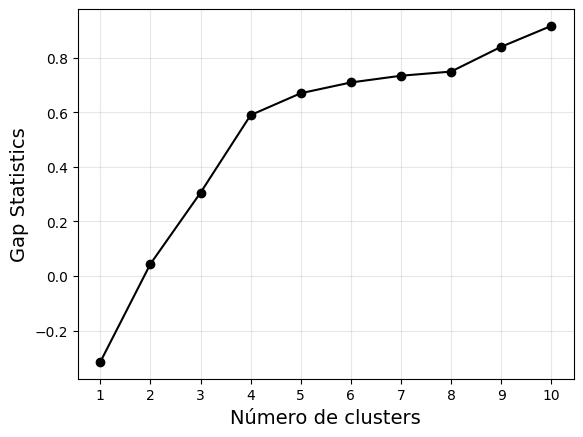

In [38]:
# vizualizando o gap statistics
plt.plot(n_clusters, gap, 'ko-')
plt.xlabel('Número de clusters', size=14)
plt.ylabel('Gap Statistics', size=14)
plt.grid(alpha=0.3)
plt.xticks(ticks=n_clusters, labels=n_clusters)
plt.show()

#### Observações
- Conseguimos identificar uma tendência na quantidade entre 5 e 6 valores para K nos nossos métodos de cotovelo e de silhueta, já no gap statistcs o valor se difere. 
- Iremos atribuir o valor de K para 6 e analisar se é válido para nosso modelo de negócio.

In [39]:
k_final = 6

kmeans_final = Pipeline([
    ('scaler', RobustScaler()),
    ('kmeans', KMeans(n_clusters=k_final, init='k-means++', random_state=42))
])

kmeans_final.fit(x)

data = x.copy()

data['cluster'] = kmeans_final.predict(x)

#### Analisando estatísticas agrupadas

In [40]:
# agrupando por cluster e aplicando funções de agregação (média, mediana e desvio padrão)
data.groupby(['cluster']).agg(func=(np.median, np.mean, np.std))

item_price                      transaction_amount              \
            median       mean       std             median        mean   
cluster                                                                  
0             20.0  21.180905  2.129029               60.0   59.673367   
1             50.0  48.770492  7.881128              600.0  579.836066   
2             50.0  48.345324  8.129132              400.0  376.258993   
3             50.0  47.822581  8.020348              155.0  148.790323   
4             20.0  21.224490  2.155640              177.5  175.688776   
5             20.0  21.647727  2.356946              280.0  290.681818   

                   quantity                       
               std   median       mean       std  
cluster                                           
0        31.205070      3.0   2.819095  1.423978  
1        69.769202     12.0  12.081967  1.718110  
2        56.238021      8.0   7.956835  1.582836  
3        71.335606      3.0   3.193548  1.611329  
4        37.150561      8.0   8.301020  1.687419  
5        37.574169     13.5  13.443182  1.124867

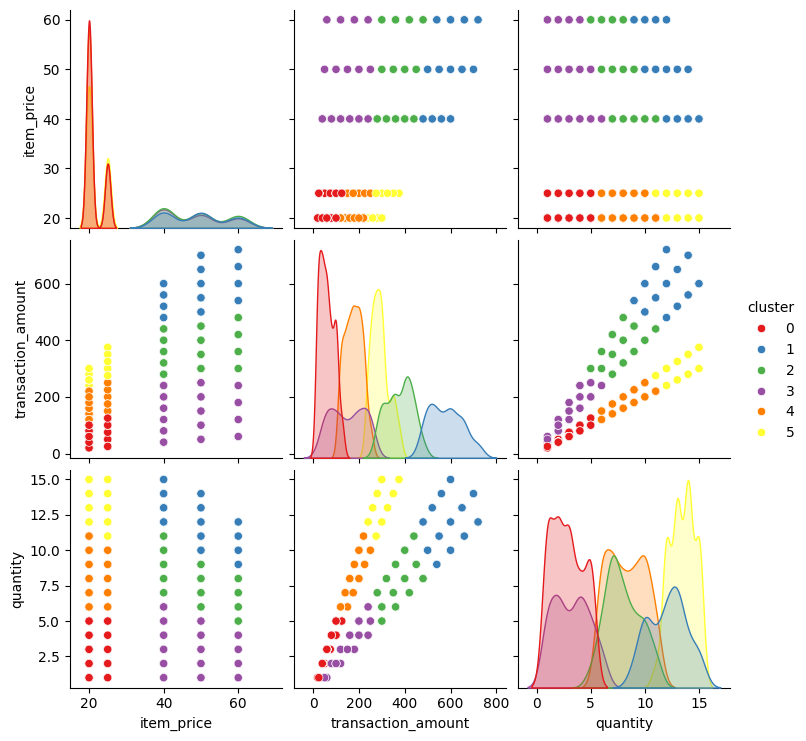

In [41]:
sns.pairplot(data, hue='cluster', palette='Set1')
plt.show()

#### Observações:
- Grupo 0: Tendem a comprar mais produtos baratos.
- Grupo 1: Tendem a comprar menos produtos, porém mais caros.
- Grupo 2: Tendem a comprar mais produtos mais caros.
- Grupo 3: Tendem a comprar menos produtos e com menor preço.
- Grupo 4: Compra produtos mais baratos em uma quantidade média.
- Grupo 5: É o grupo que mais compra em quantidades, porém produtos mais baratos.